<ipython-input-2-0be90fae6a4b>:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/content/Rahman.jpeg')


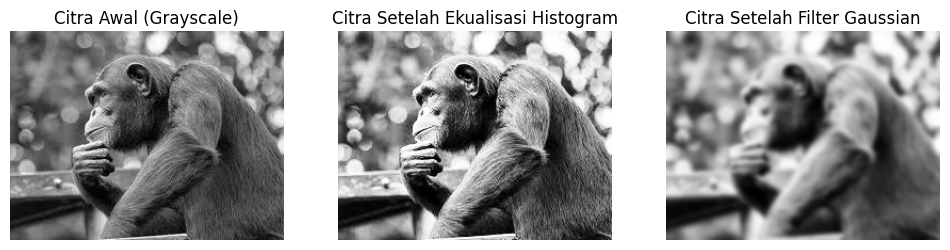

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage import exposure

# Membaca citra menggunakan imageio
image = imageio.imread('/content/Rahman.jpeg')

# Konversi ke skala abu-abu (grayscale)
if len(image.shape) == 3:
    gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])
else:
    gray_image = image

# Ekualisasi histogram menggunakan skimage exposure
equalized_image = exposure.equalize_hist(gray_image)

# Aplikasi filter Gaussian menggunakan scipy.ndimage
filtered_image = ndimage.gaussian_filter(equalized_image, sigma=2)

# Menyimpan citra hasil
imageio.imwrite('output_image.jpg', (filtered_image * 255).astype(np.uint8))

# Menampilkan citra sebelum dan sesudah pengolahan
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title('Citra Awal (Grayscale)')
ax[0].axis('off')

ax[1].imshow(equalized_image, cmap='gray')
ax[1].set_title('Citra Setelah Ekualisasi Histogram')
ax[1].axis('off')

ax[2].imshow(filtered_image, cmap='gray')
ax[2].set_title('Citra Setelah Filter Gaussian')
ax[2].axis('off')

plt.show()